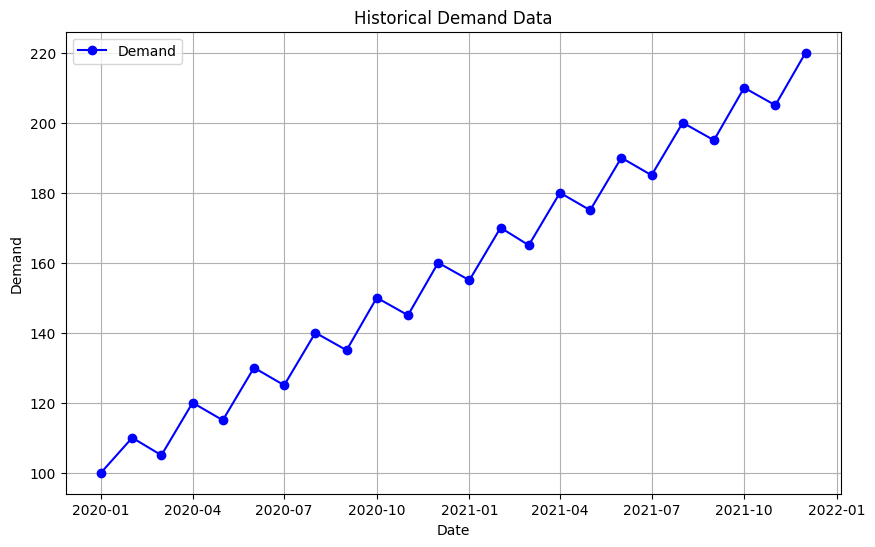

SES - MSE: 4685.333229537704, MAE: 59.130087580002304
Holt's Linear - MSE: 14436.43263139262, MAE: 120.05214670003323
Holt-Winters - MSE: 13515.621086377456, MAE: 116.2499829017769


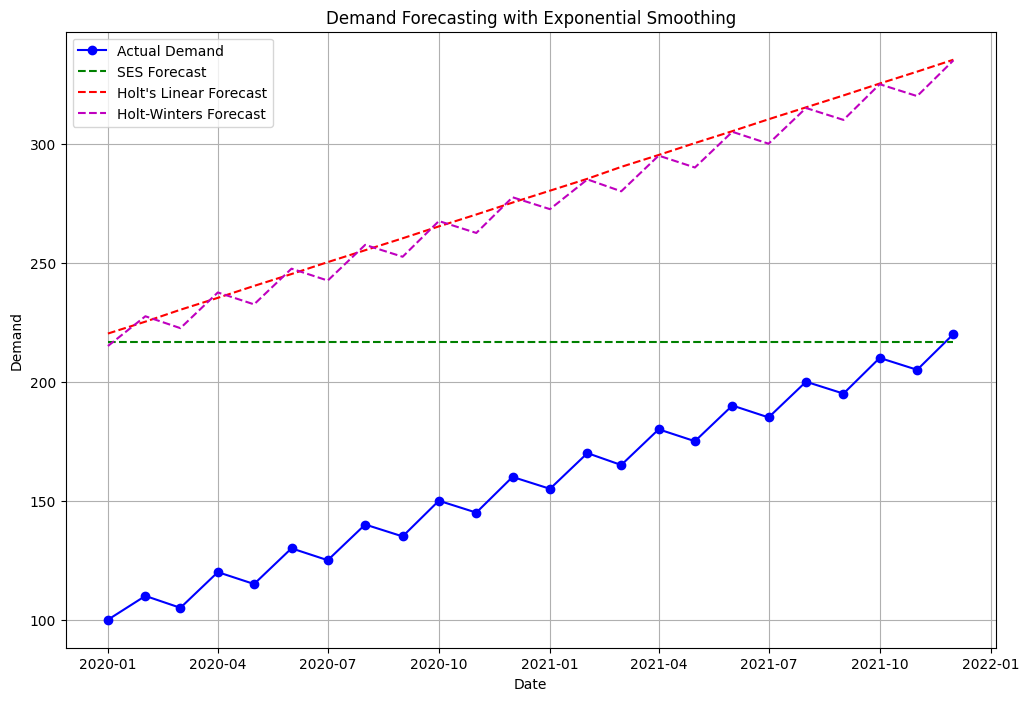

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Load and Prepare Data
data = pd.read_csv('demand_data.csv', parse_dates=['date_column'], index_col='date_column')
data.index.freq = 'MS'  # Explicitly set the frequency to 'Monthly Start'

# Step 2: Explore and Visualize Data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['demand'], marker='o', linestyle='-', color='b', label='Demand')
plt.title('Historical Demand Data')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Implement Exponential Smoothing Models
# Simple Exponential Smoothing (SES)
model_ses = ExponentialSmoothing(data['demand'], trend=None, seasonal=None)
fit_ses = model_ses.fit()

# Holt’s Linear Trend Model
model_holt = ExponentialSmoothing(data['demand'], trend='add', seasonal=None)
fit_holt = model_holt.fit()

# Holt-Winters Seasonal Method
model_hw = ExponentialSmoothing(data['demand'], trend='add', seasonal='add', seasonal_periods=12)
fit_hw = model_hw.fit()

# Step 4: Model Evaluation
# Forecasting with the models
forecast_ses = fit_ses.forecast(steps=len(data))
forecast_holt = fit_holt.forecast(steps=len(data))
forecast_hw = fit_hw.forecast(steps=len(data))

# Calculate metrics
mse_ses = mean_squared_error(data['demand'], forecast_ses)
mae_ses = mean_absolute_error(data['demand'], forecast_ses)

mse_holt = mean_squared_error(data['demand'], forecast_holt)
mae_holt = mean_absolute_error(data['demand'], forecast_holt)

mse_hw = mean_squared_error(data['demand'], forecast_hw)
mae_hw = mean_absolute_error(data['demand'], forecast_hw)

print(f"SES - MSE: {mse_ses}, MAE: {mae_ses}")
print(f"Holt's Linear - MSE: {mse_holt}, MAE: {mae_holt}")
print(f"Holt-Winters - MSE: {mse_hw}, MAE: {mae_hw}")

# Step 5: Visualization of Forecasts
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['demand'], marker='o', linestyle='-', color='b', label='Actual Demand')
plt.plot(data.index, forecast_ses, linestyle='--', color='g', label='SES Forecast')
plt.plot(data.index, forecast_holt, linestyle='--', color='r', label="Holt's Linear Forecast")
plt.plot(data.index, forecast_hw, linestyle='--', color='m', label='Holt-Winters Forecast')
plt.title('Demand Forecasting with Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()
